# Mosquito Data Analysis and Predictive Modeling for West Nile Virus in Chicago

## Introduction
This project involves a comprehensive analysis and predictive modeling of mosquito data provided by the City of Chicago, spanning from 2008 to 2019. In the first part of the project, we utilize `pandas`, `matplotlib`, and `seaborn` to perform detailed data analysis and create visualizations to understand mosquito trends in the greater Chicago area. The second part focuses on developing predictive models: a linear regression model to predict mosquito numbers and a logistic regression model to estimate the prevalence of the West Nile Virus. These models aim to provide valuable insights and tools for effective mosquito control and public health strategies.

### Import Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Inital Data Exploration and Basic Data Cleaning

In [3]:
# Load Dataset
df1= pd.read_csv('data/raw/mosquito_data.csv')
# Check Loaded Data
df1.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             18495 non-null  int64  
 1   Week             18495 non-null  int64  
 2   Address Block    18495 non-null  object 
 3   Block            18495 non-null  int64  
 4   Trap             18495 non-null  object 
 5   Trap type        18495 non-null  object 
 6   Date             18495 non-null  object 
 7   Mosquito number  18495 non-null  int64  
 8   Mosquito ID      18495 non-null  object 
 9   WNV Present      18495 non-null  object 
 10  Species          18495 non-null  object 
 11  Lat              15571 non-null  float64
 12  Lon              15571 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 1.8+ MB


### Basic Data Wrangling

In [7]:
# Shape of Dataframe
df1.shape

(18495, 13)

The dataframe have a shape of 18495, 13, which means there are 18495 rows and 13 columns. From the information provided by .info(), we can also conclude that the there are 2924 Null values for both the Latitude and Longtitude columns.

From .info() we also see that the Date column is an object data type, we would like to change that to have a datetime format.

In [11]:
# Convert 'Date' column to data time. 
df1['Date'] = pd.to_datetime(df1['Date'], format='%Y-%m-%d %H:%M:%S') 
# Used the format parameter here to make sure Date value is represented correctly

# Check if the code causes any issues with the dataframe results
df1.head()

,Year,Week,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,2019,39,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,2019,39,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,2019,39,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,2019,39,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,2019,39,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [12]:
# Check to make sure the datatype actually changed
df1.dtypes

Year                        int64
Week                        int64
Address Block              object
Block                       int64
Trap                       object
Trap type                  object
Date               datetime64[ns]
Mosquito number             int64
Mosquito ID                object
WNV Present                object
Species                    object
Lat                       float64
Lon                       float64
dtype: object

We can see that the data type of the date column is successfully changed to datetime without impacting the actual values of the column.

Now we can look at some of the columns in the dataframe and understand what is the data they are storying and how it is distributed. The columns I decided to take a closer look at are the Week, Mosquito number, Trap type, and WNV Present columns. They present two types of values, one is categorical and the other is numeric. Below is the break down and what data each column stores:

**Numeric Columns:**
- **'Week':** This represents the week in the year that the West Nile Virus test is performed.
- **'Mosquito number':** Number of mosquitoes caught in a specific trap per observation. Do keep in mind whenever the number of mosquitoes exceed 50, the excess would split unti aontoher record. Mosquito number is therefore capped at 50.

**Categorical Columns:**
- **'Trap type':** This represents the type of trap used.
- **'WNV Present':** This indicates if there are any West Nile Virus in the sample represented in that row.

In [15]:
# Data Distribution of Numeric columns
numeric_columns = ['Week', 'Mosquito number']
df1[numeric_columns].describe()

,Week,Mosquito number
count,18495.000000,18495.000000
mean,31.004001,10.879913
std,4.332020,13.475066
min,20.000000,1.000000
25%,28.000000,2.000000
50%,31.000000,5.000000
75%,34.000000,14.000000
max,40.000000,50.000000


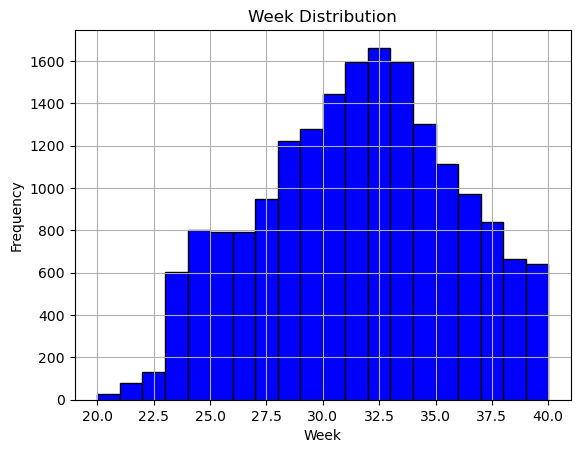

In [17]:
# Plotting basic historgram for 'Week' to show distribution
df1['Week'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Week Distribution')
plt.xlabel('Week')
plt.ylabel('Frequency')
plt.show()

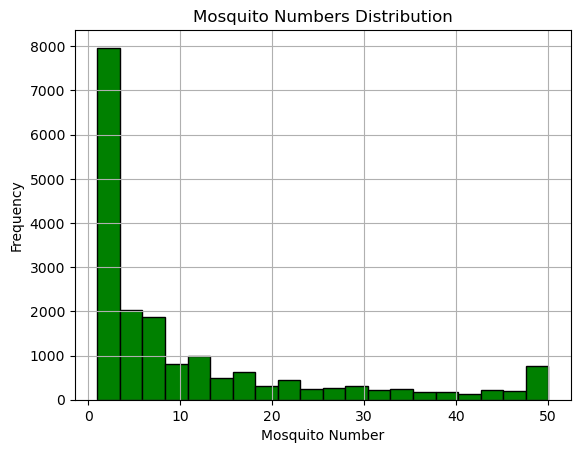

In [18]:
# Plotting basic historgram for 'Mosquito number' to show distribution
df1['Mosquito number'].hist(bins=20, color='green', edgecolor='black')
plt.title('Mosquito Numbers Distribution')
plt.xlabel('Mosquito Number')
plt.ylabel('Frequency')
plt.show()

**'Week:'**
- As shown in the .info() and .shape() function, there are 18495 observation recorded.
- The mean is around 31, which indicates on average the observations were recorded in the latter half of the year. There are approximately 52 weeks in a year, 31 is around 60% of 52. This is also represented on the histogram.
- The standard deviation is around 4.33, which suggests a moderated spread around the mean. This is also represented on the histogram.
- The range is between 20 to 40 weeks, which indicates the data spans from around Mid-May to early October. This makes sense because Mosquito season in Illinois (the state where this dataset came from), according to CristTermite (a local pest control company), begins in early April and ends in mid-October.

**'Mosquito number':**
- The average number of mosquitoes found is approximately 10.88.
- The standard deviation is about 13.48, indicating a wide variation in the number of mosquitoes found. This is shown in the corresponding histogram, where it doesn't have your typical standard distribution shape.
- The range is from 1 to 50 mosquitoes. The maximum being at 50 is expected, since if a single trap have over 50 mosquitoes the excess will be recorded into a second observation. Majority of the observations recorded between 1 to 14 mosquitoes.

In [20]:
# Data Distribution of Categorical columns
categorical_columns = ['Trap type', 'WNV Present']
df1[categorical_columns].apply(pd.Series.value_counts) # Shows count of each categorical value.

,Trap type,WNV Present
CDC,544.0,NaN
GRAVID,17741.0,NaN
OVI,1.0,NaN
SENTINEL,209.0,NaN
negative,NaN,14501.0
positive,NaN,3994.0


**'Trap type:'**
- The most common type of trap used in the obervation is Gravid, with 17741 instances. Which makes sense becasue this type of trap is specifically developed by the CDC to capture mosquitos that may be infected by West Nile Virus.
- The second most common is the CDC trap, at 544 occurences. With the provided information it is hard to determine exactly which trap the dataset is referring to when just mentioning CDC. Since there are multiple types of fly traps that have CDC in it's name, even the previously mentioned Gravid mosquito trap. However there is a high likelihood this is referring to a CDC Miniature Light Trap, since other CDC traps have more obvious names that could be used as keywords, i.e. Fay-Prince, BlackLight, and Wilton.
- There is only one instances of Ovi trap used. 

**'WNV Present':**
- Majority of sample results came up negative.
- There are 3994 observations where West Nile Virus is present.

There are some redundancy in the data. For example it is unncessary to have the 'Year' and 'Week' Column since the Date column exists. So we could choose to drop those two columns from the data frame.

In [21]:
# Dropping 'Year' and 'Week' columns
df1 = df1.drop(['Year', 'Week'], axis=1) 
# As best practice, always save to a new variable just in case somehow we need information from the old dataframe.

# Checking Results
df1.head()

,Address Block,Block,Trap,Trap type,Date,Mosquito number,Mosquito ID,WNV Present,Species,Lat,Lon
0,100XX W OHARE AIRPORT,100,T910,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,NaN,NaN
1,52XX S KOLMAR AVE,52,T114,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.798211,-87.736925
2,58XX N WESTERN AVE,58,T028,GRAVID,2019-09-26 00:09:00,2,Res,negative,CULEX RESTUANS,41.987245,-87.689417
3,39XX N SPRINGFIELD AVE,39,T228,GRAVID,2019-09-26 00:09:00,1,Res,negative,CULEX RESTUANS,41.953664,-87.724987
4,131XX S BRANDON AVE,131,T209,GRAVID,2019-09-26 00:09:00,9,Res,negative,CULEX RESTUANS,41.657069,-87.546049


In [22]:
# To have the column orders make more sense, I am reordering the columns. 
new_order = ['Date', 'Address Block', 'Block', 'Lat', 'Lon', 'Trap type', 'Trap', 
             'Mosquito ID', 'Species', 'Mosquito number', 'WNV Present']
df1 = df1[new_order]

#Check Results
df1.head()

,Date,Address Block,Block,Lat,Lon,Trap type,Trap,Mosquito ID,Species,Mosquito number,WNV Present
0,2019-09-26 00:09:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T910,Res,CULEX RESTUANS,2,negative
1,2019-09-26 00:09:00,52XX S KOLMAR AVE,52,41.798211,-87.736925,GRAVID,T114,Res,CULEX RESTUANS,1,negative
2,2019-09-26 00:09:00,58XX N WESTERN AVE,58,41.987245,-87.689417,GRAVID,T028,Res,CULEX RESTUANS,2,negative
3,2019-09-26 00:09:00,39XX N SPRINGFIELD AVE,39,41.953664,-87.724987,GRAVID,T228,Res,CULEX RESTUANS,1,negative
4,2019-09-26 00:09:00,131XX S BRANDON AVE,131,41.657069,-87.546049,GRAVID,T209,Res,CULEX RESTUANS,9,negative


Next I am going to check the dataframe for null values. We know they at least exist in the 'Lat' and 'Lon' columns based on the information provided by .info().

In [23]:
# Show all rows with null value
df1[df1.isnull().any(axis=1)]

,Date,Address Block,Block,Lat,Lon,Trap type,Trap,Mosquito ID,Species,Mosquito number,WNV Present
0,2019-09-26 00:09:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T910,Res,CULEX RESTUANS,2,negative
44,2019-09-19 00:09:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T910,Res,CULEX RESTUANS,3,negative
55,2019-09-19 00:09:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T905,Ter,CULEX TERRITANS,2,negative
57,2019-09-19 00:09:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T905,Res,CULEX RESTUANS,4,negative
93,2019-09-12 00:09:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T905,Res,CULEX RESTUANS,2,negative
...,...,...,...,...,...,...,...,...,...,...,...
18476,2013-07-19 00:07:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T912,Res,CULEX RESTUANS,46,positive
18477,2013-08-29 00:08:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T906,Pip,CULEX PIPIENS,50,positive
18486,2016-07-21 00:07:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T911,Res,CULEX RESTUANS,47,positive
18488,2017-07-27 00:07:00,100XX W OHARE AIRPORT,100,NaN,NaN,GRAVID,T900,Res,CULEX RESTUANS,17,positive


From this, we can confirm the suspicion that all null values only exist in the 'Lon' and 'Lat' columns. When filtering all observations these null values seems to be only present for Address Block 100XX W OHARE AIPORT Block 100. Let's check if any of the Block 100 observations have Lat and Lon value:

In [25]:
# Filter for rows where Block = 100 but contains Lat and Lon value
df1[(df1['Block'] == 100) & df1['Lat'].notnull() & df1['Lon'].notnull()]

,Date,Address Block,Block,Lat,Lon,Trap type,Trap,Mosquito ID,Species,Mosquito number,WNV Present


There are no existing Lat and Lon values for Block 100. Since 2924 rows is a sizable amount of 18495 rows (about 16%), it would not be a good idea to drop rows with null value. Lat and Lon values may be useful for visualizations later on, so it would also be a good idea to keep. Since we know block 100 is the Ohare Airport, we can replace the null values for Block 100 with the Lat and Lon value of Ohare Aiport. 

In [27]:
# Define new Lat and Lon values:
new_lat = 41.978611
new_lon = -87.904724

# Replace Lat and Lon value of rows where 'Block' = 100
df1.loc[df1['Block'] == 100, 'Lat'] = new_lat
df1.loc[df1['Block'] == 100, 'Lon'] = new_lon

# Checking results
df1.head()

,Date,Address Block,Block,Lat,Lon,Trap type,Trap,Mosquito ID,Species,Mosquito number,WNV Present
0,2019-09-26 00:09:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T910,Res,CULEX RESTUANS,2,negative
1,2019-09-26 00:09:00,52XX S KOLMAR AVE,52,41.798211,-87.736925,GRAVID,T114,Res,CULEX RESTUANS,1,negative
2,2019-09-26 00:09:00,58XX N WESTERN AVE,58,41.987245,-87.689417,GRAVID,T028,Res,CULEX RESTUANS,2,negative
3,2019-09-26 00:09:00,39XX N SPRINGFIELD AVE,39,41.953664,-87.724987,GRAVID,T228,Res,CULEX RESTUANS,1,negative
4,2019-09-26 00:09:00,131XX S BRANDON AVE,131,41.657069,-87.546049,GRAVID,T209,Res,CULEX RESTUANS,9,negative


In [28]:
# Making sure all Block 100 results have the updated value
df1[df1['Block'] == 100]

,Date,Address Block,Block,Lat,Lon,Trap type,Trap,Mosquito ID,Species,Mosquito number,WNV Present
0,2019-09-26 00:09:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T910,Res,CULEX RESTUANS,2,negative
44,2019-09-19 00:09:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T910,Res,CULEX RESTUANS,3,negative
55,2019-09-19 00:09:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T905,Ter,CULEX TERRITANS,2,negative
57,2019-09-19 00:09:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T905,Res,CULEX RESTUANS,4,negative
93,2019-09-12 00:09:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T905,Res,CULEX RESTUANS,2,negative
...,...,...,...,...,...,...,...,...,...,...,...
18476,2013-07-19 00:07:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T912,Res,CULEX RESTUANS,46,positive
18477,2013-08-29 00:08:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T906,Pip,CULEX PIPIENS,50,positive
18486,2016-07-21 00:07:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T911,Res,CULEX RESTUANS,47,positive
18488,2017-07-27 00:07:00,100XX W OHARE AIRPORT,100,41.978611,-87.904724,GRAVID,T900,Res,CULEX RESTUANS,17,positive


### Basic Exploritory Data Analysis
First we will look at the relationship between mosquito number and date.

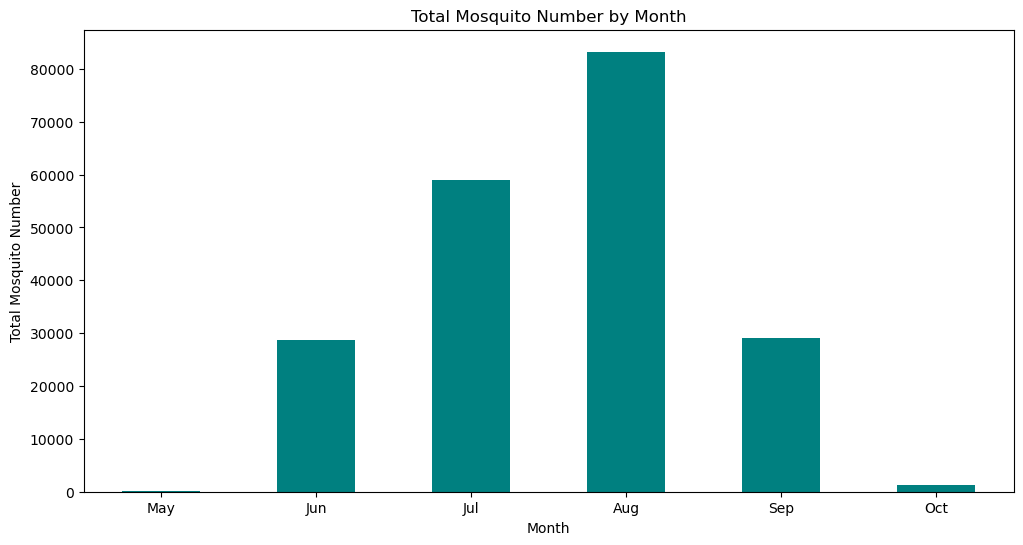

In [30]:
# Extracting month
df1['Month'] = df1['Date'].dt.month

# Sum of mosquitos per month
monthly_data = df1.groupby('Month')['Mosquito number'].sum()

# Bar Chart
plt.figure(figsize=(12, 6))
monthly_data.plot(kind='bar', color='teal')
plt.title('Total Mosquito Number by Month')
plt.xlabel('Month')
plt.ylabel('Total Mosquito Number')
plt.xticks(ticks=range(6), labels=['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'], rotation=0)
plt.show()

We know that the observations are all recorded between May and October. So for the first bar chart we only have it focus on those months. We see the month of August is the month with the most mosquitos. This makes sense since mosquitos like hot weather, and August on average is the hottest month in Chicago according to National Weather Services.

<Figure size 1200x1000 with 0 Axes>

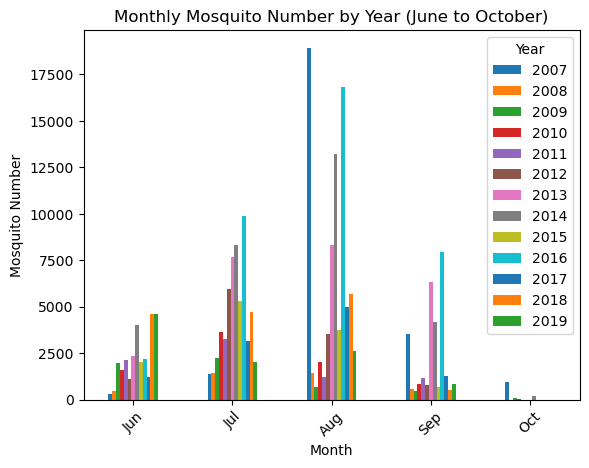

In [31]:
# Extracting Year
df1['Year'] = df1['Date'].dt.year

# Aggregating mosquito county by Month and Year
year_month_data = df1.groupby(['Year', 'Month'])['Mosquito number'].sum().unstack(level=0)

# Concentrate the chart on Feb to Jun
filtered_data = year_month_data.loc[6:10]

# Group bar chart
plt.figure(figsize=(12, 10))
filtered_data.plot(kind='bar', stacked=False)
plt.title('Monthly Mosquito Number by Year (June to October)')
plt.xlabel('Month')
plt.ylabel('Mosquito Number')
plt.xticks(ticks=range(5), labels=['Jun', 'Jul', 'Aug', 'Sep', 'Oct'], rotation=45)
plt.legend(title='Year', loc='upper right')
plt.show()

When we break down the results by year with a grouped chart, May was removed from this chart since the observation from this month was insignificant, we can also see the change in mosquito numbers across the years. There doesn't seem to be much of note other than 2007 have the highest August mosquito numbers and 2016 have consistantly relatively elevated levels of mosquito numbers in most months. This is probably because, according to the National Weather Service, between July to Sep, Chicago have more than normal instances of rainfall, high humidity and high temperatures, which is favorable to mosquitos. The report released by Chicago Department of Public Health states that West Nile Virus infection for that year was moderate. There were 49 cases of human infection, which is triple the amount of reported case in 2015. In that same report, they also attribute the increase from higher than average temperature for that year.

### More Advanced Exploritory Data Analysis

Now we explore the relationship between species and West Nile Virus prevalance.

<Figure size 1200x600 with 0 Axes>

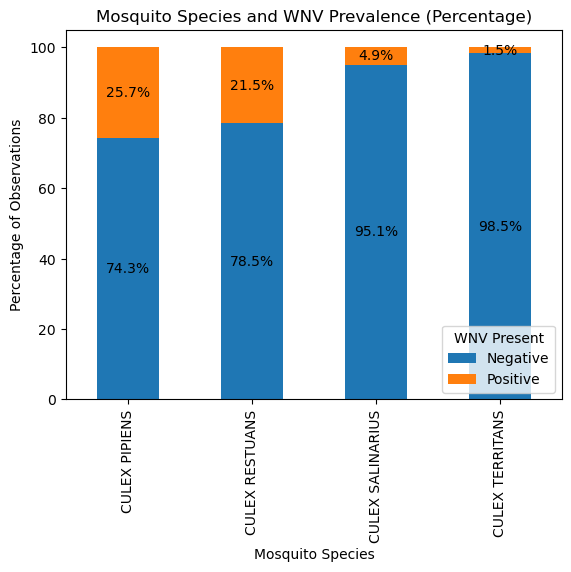

In [36]:
# Aggregate Data by Species and WNV Presence:
species_wnv_data = df1.groupby(['Species', 'WNV Present']).size().unstack()

# Calculate the percentage of samples with specific mosquito species that have negative or positive West Nile Virus
species_wnv_percentage = species_wnv_data.div(species_wnv_data.sum(axis=1), axis=0) * 100

# Plot Stacked Bar Chart with Percentage
plt.figure(figsize=(12, 6))
ax = species_wnv_percentage.plot(kind='bar', stacked=True)
plt.title('Mosquito Species and WNV Prevalence (Percentage)')
plt.xlabel('Mosquito Species')
plt.ylabel('Percentage of Observations')
plt.legend(title='WNV Present', labels=['Negative', 'Positive'], loc='lower right')

# Add percentage labels on each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Only display label if height is positive
        ax.text(x + width/2, 
                y + height/2, 
                f'{height:.1f}%', 
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

From this chart we can see that the species Culex Pipens and Culex Restuans are more susceptible to West Nile Virus. This coincides with National Institues of Health's article, which cites Pipiens, Restuans, and Salinarius as the principal vectors for West Nile Virus in North America. Which also means the significantly lower % of positive Salinarius observations in our data is a suprise. However this could be more from the consequence that there weren't many Salinarius samples. The sample size of each species could be seen below:

In [37]:
# Counting the number of observations for each Species
species_counts = df1['Species'].value_counts()

# Print result
print("Number of Observations for Each Mosquito Species:\n")
for species, count in species_counts.items():
    print(f"{species}: {count} observations")

Number of Observations for Each Mosquito Species:

CULEX RESTUANS: 11866 observations
CULEX PIPIENS: 5486 observations
CULEX TERRITANS: 917 observations
CULEX SALINARIUS: 226 observations


As seen, Salinarius had the smallest sample size out of all the species, which could explain the suprise that it doesn't have as much positive samples despite scientific sources says it is one of the three specicies that are the principal vectors for West Nile Virus in North America.

Next we will explore the relationship between the number of mosquitos caught and trap type.

C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


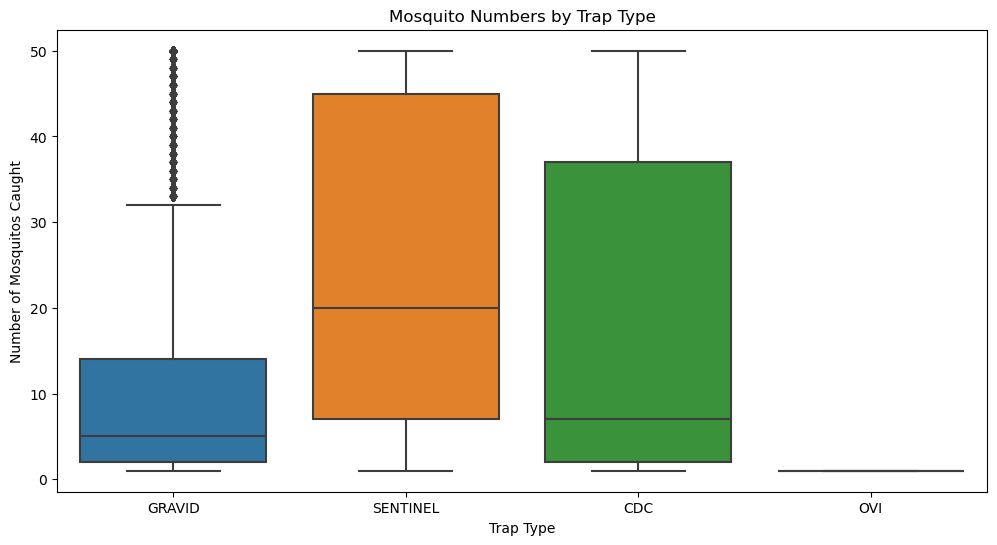

In [39]:
# Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df1, x='Trap type', y='Mosquito number')
plt.title('Mosquito Numbers by Trap Type')
plt.xlabel('Trap Type')
plt.ylabel('Number of Mosquitos Caught')
plt.show()